# House Price Regression using Sklearn Pipelines and Ensemble Methods

In this project, we will try to predict the house prices of residential homes in Ames, Iowa. The dataset provided to us has 81 columns of which 79 are explanatory variables, which is a lot. Having so many features to deal with is a challenging task but also an opportunity to learn how to handle such a dataset. The data available on Kaggle is already split in train and test files each of them containing data of 1460 and 1459 houses respectively. We also have a data_description file which has a description of each of the columns.

Let's begin with discussing the flow of this project:

1. Preliminary data exploration
2. Creating an Imputing Strategy
3. Feature Engineering
4. Feature Engineering and EDA
5. More Feature Engineering
6. Creating Data Preparation Pipeline
7. Testing Machine Learning Models
8. Hyperparameter Tuning
9. Ensembling the Best Models
10. Creation of Complete Pipeline

### Importing the necessary libraries and the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedKFold, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, RobustScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [2]:
# Setting the display options

pd.set_option('display.max_columns',None)
sns.set()

In [3]:
# Importing the housing train and test dataset

train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
# We will make a copy of the imported datasets to work upon. It's a good practice always to make changes on a copy rather than the original dataset.

df_train = train.copy()
df_test = test.copy()

## Preliminary Data Exploration

We will only explore the training data and make our pipelines based off of it. This is because in real life we can't possibly know what the test set will look like. We have to work with what we have at hand.

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

Since each house has a unique Id, we will drop that column beacause it will have no predictive power.

In [7]:
df_train.drop(['Id'],axis=1,inplace=True)
df_test.drop(['Id'],axis=1,inplace=True)

In [8]:
# Checking the columns that have missing data and displaying only those

df_train.isnull().sum()[df_train.isnull().sum() != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Now let's see the content of some of the missing columns using pandas value_counts method and discuss how we can fill those values.

In [9]:
df_train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

We have quite a lot of data missing for LotFrontage column. We can impute the same using the median value. We won't use mean here since it can be influenced by any outliers the data might have.

In [10]:
df_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

For categorical columns with missing values, we can impute them by using the mode, i.e., fill with the most common label in that feature

In [11]:
df_train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [12]:
df_train['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

For the above two features we see that majority of the data are missing. On careful inspection of the data description file, we see that the missing values are themselves a category - NA. Which means that a NaN values in Alley means no alley access is present and similar for Fence column and many other columns.

Now let's explore features with missing data alongside other features who are related to that feature. For eg, Fireplaces and FireplaceQu are related.

In [13]:
df_train[['MasVnrType','MasVnrArea']][df_train['MasVnrType'].isnull()].head()

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN


In [14]:
df_train[['Fireplaces','FireplaceQu']][df_train['FireplaceQu'].isnull()].head()

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN


In [15]:
df_train[['PoolArea','PoolQC']][df_train['PoolQC'].isnull()].head()

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [16]:
df_train[['MiscVal','MiscFeature']][df_train['MiscFeature'].isnull()].head()

,MiscVal,MiscFeature
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [17]:
df_train[['BsmtFullBath','BsmtHalfBath','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']][df_train['BsmtFinType2'].isnull()].head()

,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,0,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0
39,0,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0
90,0,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0
102,0,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0
156,0,0,NaN,NaN,NaN,NaN,0,NaN,0,0,0


In [18]:
df_train[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']][df_train['GarageType'].isnull()].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN


As we can observe from the above outputs, wherever we have a missing feature, the corresponding numeric column related to that feature has a value of 0. Again referring to the data description file, we see that the features above have the missing value itself as the label - NA

Let's sneak into the test data's missing values just so that we get an idea how much we need to prepare our data cleaning pipelines so that we transform our test data correctly.

In [19]:
df_test.isnull().sum()[df_test.isnull().sum() != 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

Damnn. A lot more features with missing values than what we saw in the training data. The real challenge here is to make an imputing strategy in such a way that we are able to fill missing values of columns in the testing set that were not having any missing values in our training set. The data_description file is going to come in handy to understand each of the features and how we would fill the missing values in them.

## Creating an Imputing strategy

Based on what we know from our preliminary data exploration and the data_description file, we will now divide our data in three groups:
1. Features requiring impution with 'NA'
2. Features requiring median imputing
3. Features requiring mode imputing

So we will create three lists containing the column names for the above three divisions.

In [20]:
# Based on the data_description file that mentions in certain features that NA itself is a category
# We also included GarageYrBlt since there can't be a value for the year if the garage is never built

NA_impute = ['Alley','BsmtQual', 'BsmtCond',
             'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','FireplaceQu',
             'GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual', 'GarageCond',
             'PoolQC', 'Fence', 'MiscFeature']

In [21]:
# df_train.select_dtypes(exclude='O').columns.values

In [22]:
# Numerical features not including SalePrice which is the target variable

median_impute = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
                 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                 'Fireplaces','GarageCars', 'GarageArea', 'WoodDeckSF',
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                 'ScreenPorch', 'PoolArea', 'MiscVal']

In [23]:
# Categorical features excluding the features in NA_impute and SalePrice (hence the [:-1] slice)

mode_impute = [att for att in df_train.columns.values if att not in NA_impute and att not in median_impute][:-1]

Since the imputations we do on the training data also need to be done on the testing data, a smarter way is to create a custom transformer that can do the same operations on the testing data without us having to do all the work again. We leverage our OOPS knowledge and sklearn's capabality to allow the creation of a custom transformer class. We'll name it MissingImputer and it will perform all the three types of imputations when we transform our data.

In [24]:
# Our class here inherits from sklearn's BaseEstimator and TransformerMixin classes 
# which provide us some standard methods like fit_transform(), set_params(), get_params(), etc

class MissingImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self,NA_impute=NA_impute,median_impute=median_impute,mode_impute=mode_impute):
        self.NA_impute = NA_impute
        self.median_impute = median_impute
        self.mode_impute = mode_impute
        
    def fit(self,X,y=None):
        self.median_info = [np.nanmedian(X[att]) for att in self.median_impute]
        self.mode_info = [X[att].mode()[0] for att in self.mode_impute]
        return self
    
    def transform(self,X,y=None):
        # Remember to always create a copy :)
        X = X.copy()
        X[NA_impute] = X[self.NA_impute].fillna('NA')
        for median,att in zip(self.median_info,self.median_impute):
            X[att].fillna(median,inplace=True)
        for mode,att in zip(self.mode_info,self.mode_impute):
            X[att].fillna(mode,inplace=True)
        return X

**Note** : We use the fit method only on the training data. Which means, our custom imputer here will only save the median and mode info based on the training data and do the transformations on the test data accordingly. There's an underlying assumption (something that you'd also hope to be true) that the test data has a similar distribution as that of the training data. Makes sense since we could not possibly know beforehand what the test data will look like. If we were to use the median and mode info of the test data, we would be essentially causing **data leakage**. 

In [25]:
# Fitting and transforming (imputing) the training data

df_train = MissingImputer().fit_transform(df_train)

In [26]:
df_train.isnull().sum()[df_train.isnull().sum() != 0]

Series([], dtype: int64)

Voila! All our missing values have been dealt with.

## Feature Engineering and EDA

In this section we will perform bivariate visualizations of all the features with our target variable - SalePrice.\
Before that we will split our features in numerical and categorical types and check if we need to deal with some of the features.

In [27]:
# select_dtypes allows us to filter a certain data type in our pandas dataframe

df_train.select_dtypes(exclude='O').columns.values

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'], dtype=object)

In [28]:
# We have created a list of feature names split into categorical and numerical types.
# We have included MSSubClass in categorical list because despite it being of numerical type,
# the labels represent a class and have no order.
# We also observe that GarageYrBlt feature is now of type 'Object'.
# This is because we imputed it with the string - 'NA'.

categorical= ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
              'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
              'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
              'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
              'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
              'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
              'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
              'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
              'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
              'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

numerical = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
             'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
             'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
             'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
             'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Let's check roughly how our SalePrice and the categorical features relate and see if we can derive some insights from it.

In [29]:
# I have commented it out because this way of dipsplaying plots is not the most elegant one but is only for insight derivation.
# A few steps ahead we will try to display the plots in a better way.

# for att in categorical:
#     plt.figure()
#     sns.barplot(x=att,y='SalePrice',data=df_train)

From the above plots, we see that some of the categorical features show order. Now what does that mean?\
Let's take one example - FireplaceQu feature. According to our data description file, this feature rates the quality of the fireplace, if present. It has the labels NA (No fireplace), Po (Poor), Fa (Fair), TA (Average), Gd (Good) and Ex (Excellent). Since it's a rating, it has an order. We see that as the quality gets better, the mean sale price also increases.

For such features (called ordinal categories), we can convert them to discrete numerical categories by numbering the labels in the right order. We will refer our data description file and our above plots to see what numbers we need to give the labels. But first, let's make a list of features that we identified as ordinal.

In [30]:
# List of categorical features whose labels show some order

cat_ORD = ['Street', 'Alley', 'LotShape', 'LandSlope','ExterQual', 'ExterCond',
           'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'CentralAir',
           'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual',
           'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

In [31]:
# Creating a map of labels of the above features to replace them with a suitable numeric value
# Again we need to refer to the data description file for this to understand the order

ordinal_map = {'NA':0, 'Grvl':1,'Pave':2,'Reg':0,'IR1':1,'IR2':2,'IR3':3,'Gtl':0,'Mod':1,
               'Sev':2,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5,'No':1,'Mn':2,'Av':3,'N':0,
               'P':1,'Y':2,'Unf':1,'RFn':2,'Fin':3,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}

Just like before, we create our own custom ordinal encoder so that we can use it in a pipeline later.

In [32]:
class ord_MAP(BaseEstimator,TransformerMixin):
    
    def __init__(self,cat_ORD=cat_ORD,ordinal_map = ordinal_map):
        self.cat_ORD = cat_ORD
        self.ord_map = ordinal_map
    
    def fit(self,X,y=None):
        X['MSSubClass'] = X['MSSubClass'].apply(lambda x: str(x))
        return self
    
    def transform(self,X,y=None):
        X = X.copy()
        for att in self.cat_ORD:
            X[att] = X[att].map(self.ord_map)
        return X

In [33]:
# Fitting and transforming (mapping the values)

df_train = ord_MAP().fit_transform(df_train)

In [34]:
df_train[cat_ORD].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Street        1460 non-null   int64
 1   Alley         1460 non-null   int64
 2   LotShape      1460 non-null   int64
 3   LandSlope     1460 non-null   int64
 4   ExterQual     1460 non-null   int64
 5   ExterCond     1460 non-null   int64
 6   BsmtQual      1460 non-null   int64
 7   BsmtCond      1460 non-null   int64
 8   BsmtExposure  1460 non-null   int64
 9   HeatingQC     1460 non-null   int64
 10  CentralAir    1460 non-null   int64
 11  KitchenQual   1460 non-null   int64
 12  FireplaceQu   1460 non-null   int64
 13  GarageFinish  1460 non-null   int64
 14  GarageQual    1460 non-null   int64
 15  GarageCond    1460 non-null   int64
 16  PavedDrive    1460 non-null   int64
 17  PoolQC        1460 non-null   int64
 18  Fence         1460 non-null   int64
dtypes: int64(19)
memory usage: 

Great! Now we have successfully converted the ordinal categories to discrete numerical type. We will update our list of data types as we keep moving ahead.

In [35]:
# Updating our categorical list

categorical = ['MSSubClass', 'MSZoning', 'LandContour', 'Utilities',
               'LotConfig', 'Neighborhood', 'Condition1',
               'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
               'RoofMatl', 'Exterior1st', 'Exterior2nd',
               'MasVnrType', 'Foundation', 'BsmtFinType1',
               'BsmtFinType2', 'Heating', 'Electrical',
               'Functional', 'GarageType', 'GarageYrBlt',
               'MiscFeature', 'SaleType', 'SaleCondition']

Finally it's time to plot and see how the sale price is dependent on these features.

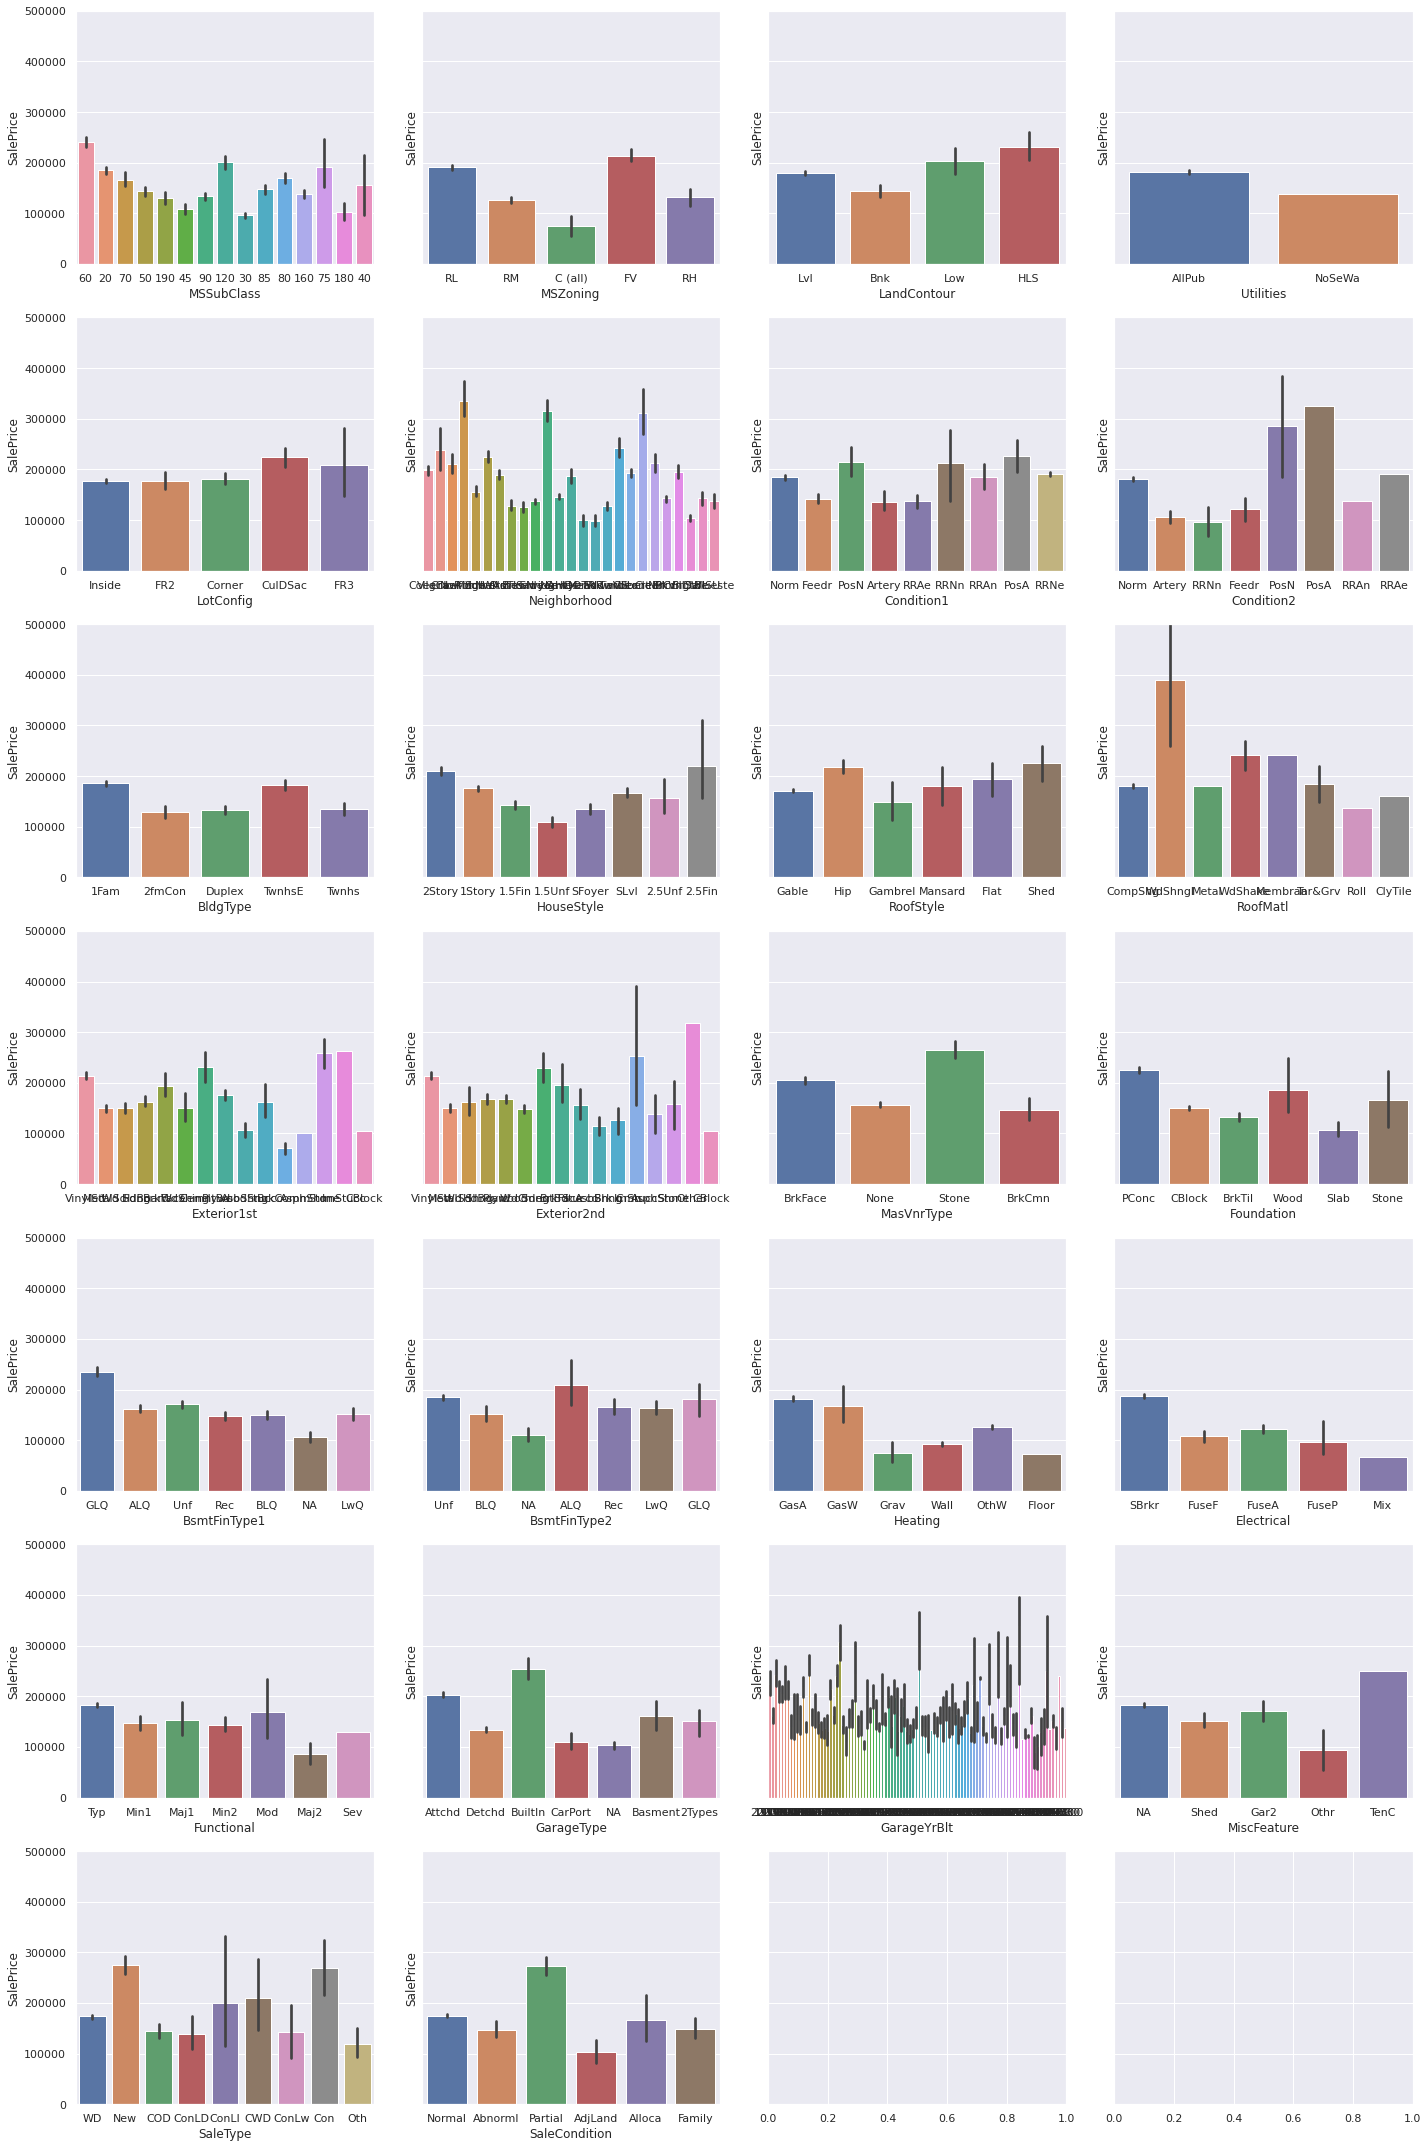

In [36]:
fig, ax = plt.subplots(7,4,figsize=(20,30),sharey=True)
i = j = 0
for att in categorical:
    sns.barplot(x=att,y='SalePrice',data=df_train,ax=ax[i][j])
    plt.ylim([0,500000])
    j = j + 1 if j <= 2 else 0
    i = i + 1 if j == 0 and i <=5 else i
    
plt.tight_layout()

Quite a lot to take in here. But most important thing to observe in these plots is that some features have way too many labels present. Take Neighborhood for example. GarageYrBlt is another such feature since it literally has different years as labels which is a lot. We will deal with this problem soon when we start building our categorical pipeline. The reason we can't have these many labels is simple - one hot encoding. One hot encoding these features with high cardinality will create so many extra features in our model increasing the dimensions of our final preprocessed data.

We will keep in mind what insights and conclusions we derive from our visualizations and move on to the next step of visualizing the numerical features.

In [37]:
# Let's seggregate the numerical list further into discrete and continuous type. We have also included the newly converted cat_ORD features.

numerical_discrete = ['OverallQual', 'OverallCond', 'BsmtFullBath',
                      'BsmtHalfBath', 'FullBath', 'HalfBath',
                      'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                      'Fireplaces', 'GarageCars','Street', 'Alley',
                      'LotShape', 'LandSlope','ExterQual', 'ExterCond',
                      'BsmtQual', 'BsmtCond', 'BsmtExposure',
                      'HeatingQC', 'CentralAir', 'KitchenQual',
                      'FireplaceQu', 'GarageFinish', 'GarageQual',
                      'GarageCond', 'PavedDrive', 'PoolQC',
                      'Fence', 'MoSold', 'YrSold']

numerical_continuous = ['LotFrontage', 'LotArea', 'MasVnrArea',
                        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                        'LowQualFinSF', 'GrLivArea', 'GarageArea',
                        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                        '3SsnPorch', 'ScreenPorch', 'PoolArea',
                        'MiscVal', 'YearBuilt', 'YearRemodAdd']

Now we plot both of these feature types - barplot for discrete features and scatterplot for continuous features

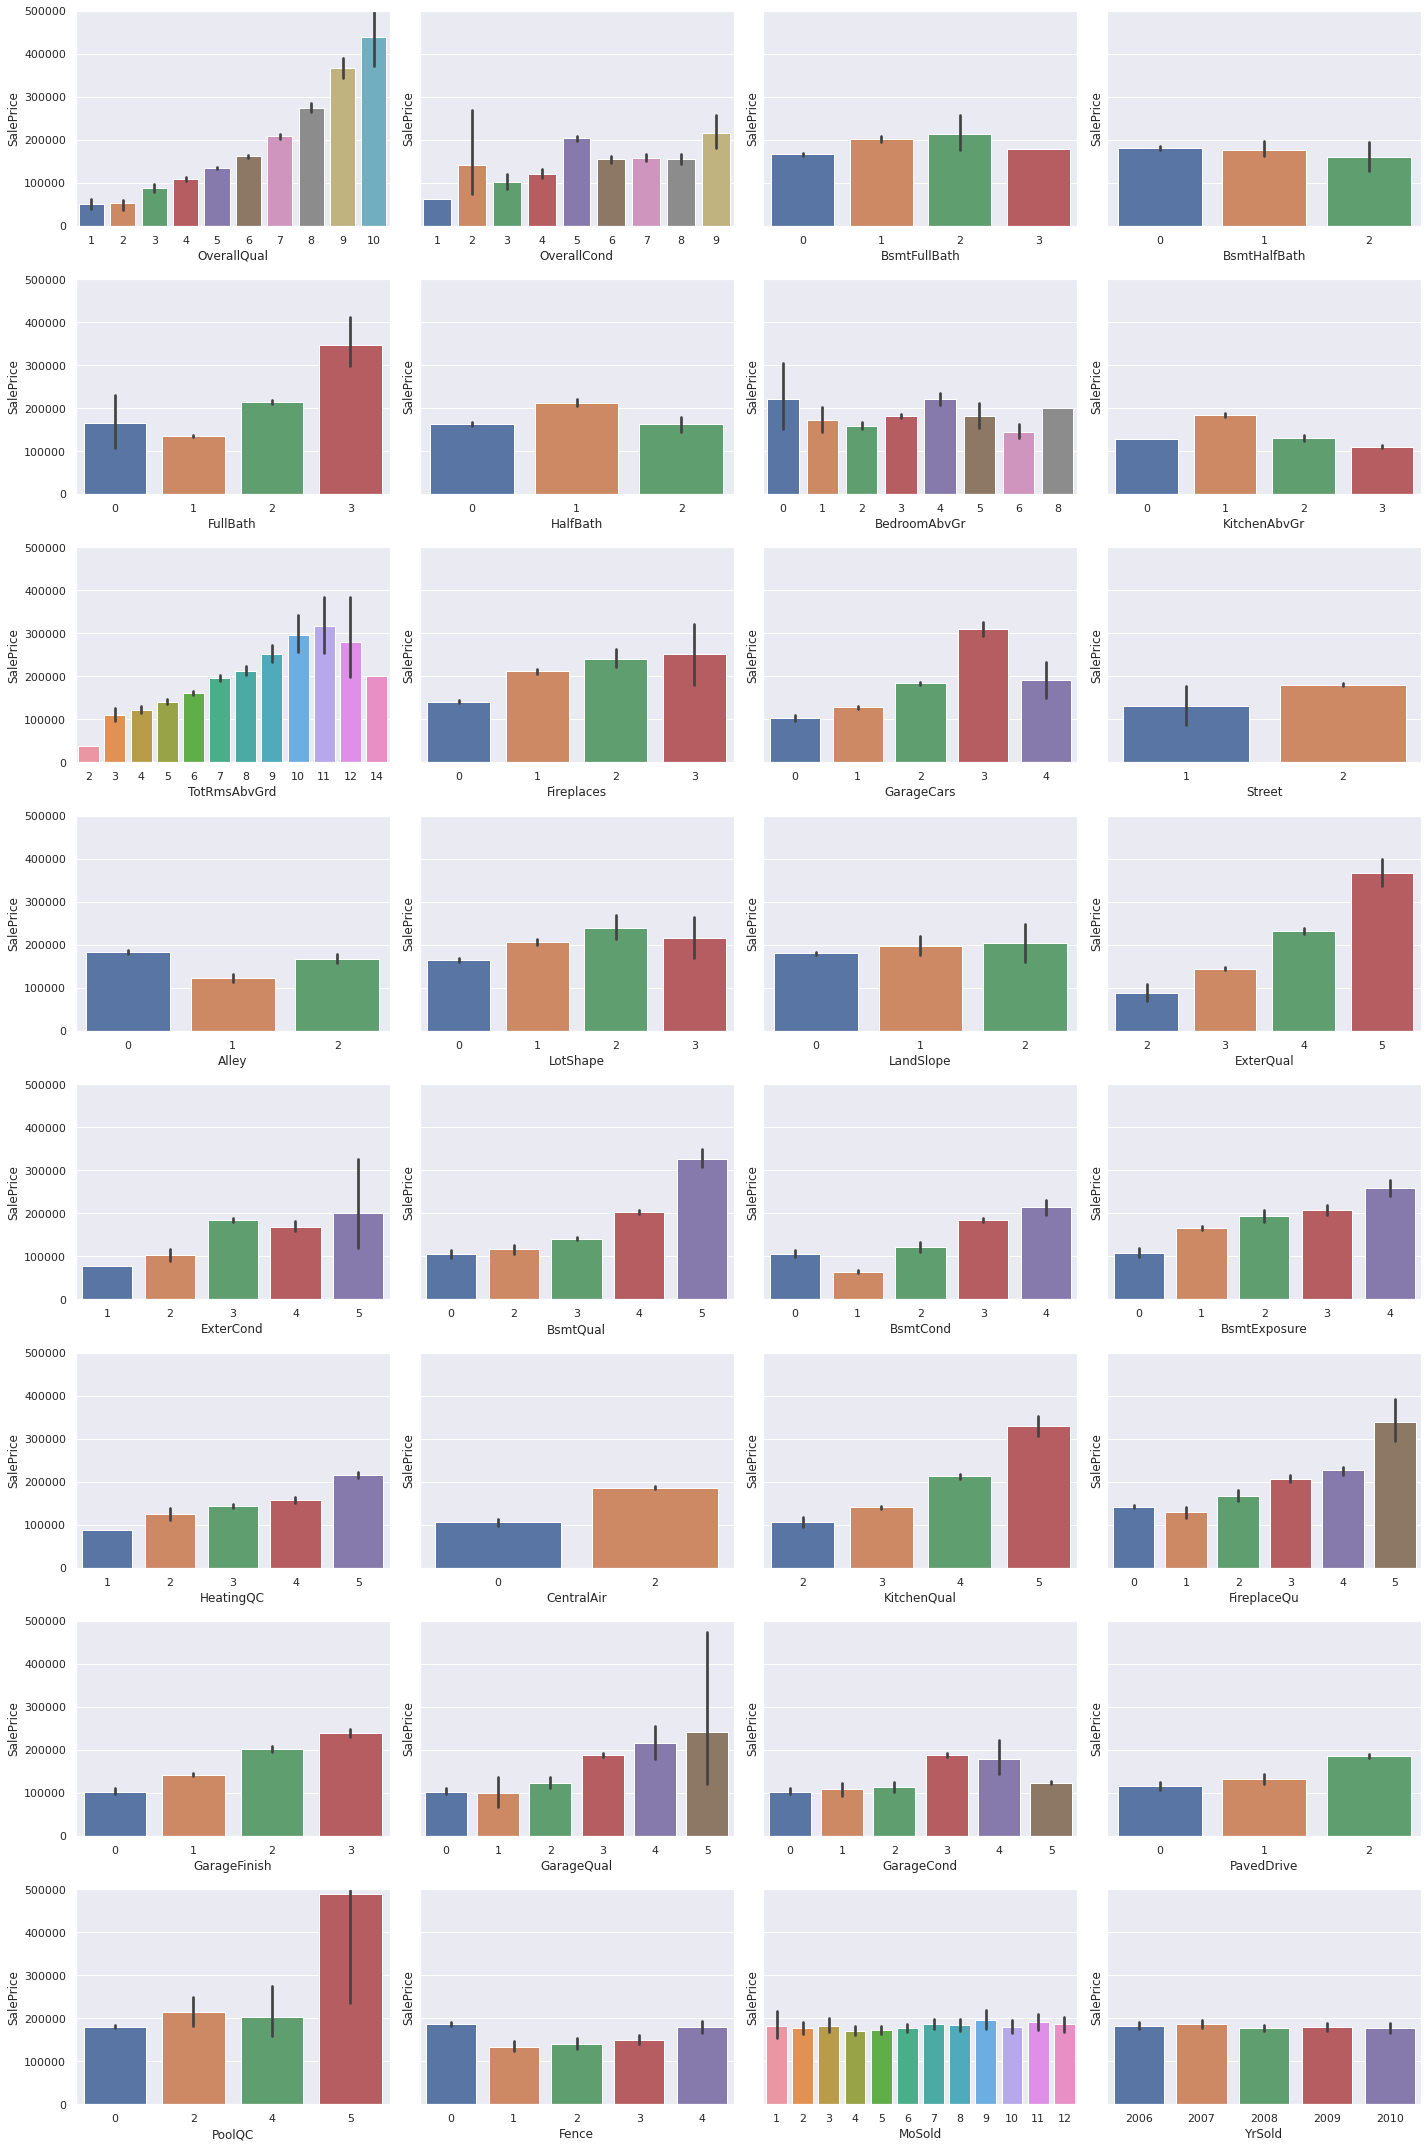

In [38]:
fig, ax = plt.subplots(8,4,figsize=(20,30),sharey=True)
i = j = 0
for att in numerical_discrete:
    sns.barplot(x=att,y='SalePrice',data=df_train,ax=ax[i][j])
    plt.ylim([0,500000])
    j = j + 1 if j <= 2 else 0
    i = i + 1 if j == 0 and i <=6 else i
    
plt.tight_layout()

Most of our discrete numerical features show some order (as expected). The features MoSold and YrSold indicating the month and the year that the house was sold in, do not show much variation in sale price.
The error bar in the barplots are indicative of the variation present. Take GarageQual for example. The length of the error bar for rating 5 is high, which means that there's a huge difference is sale prices between the houses having garage quality rating as 5. Not a good news for our model, but we will have to live with it.

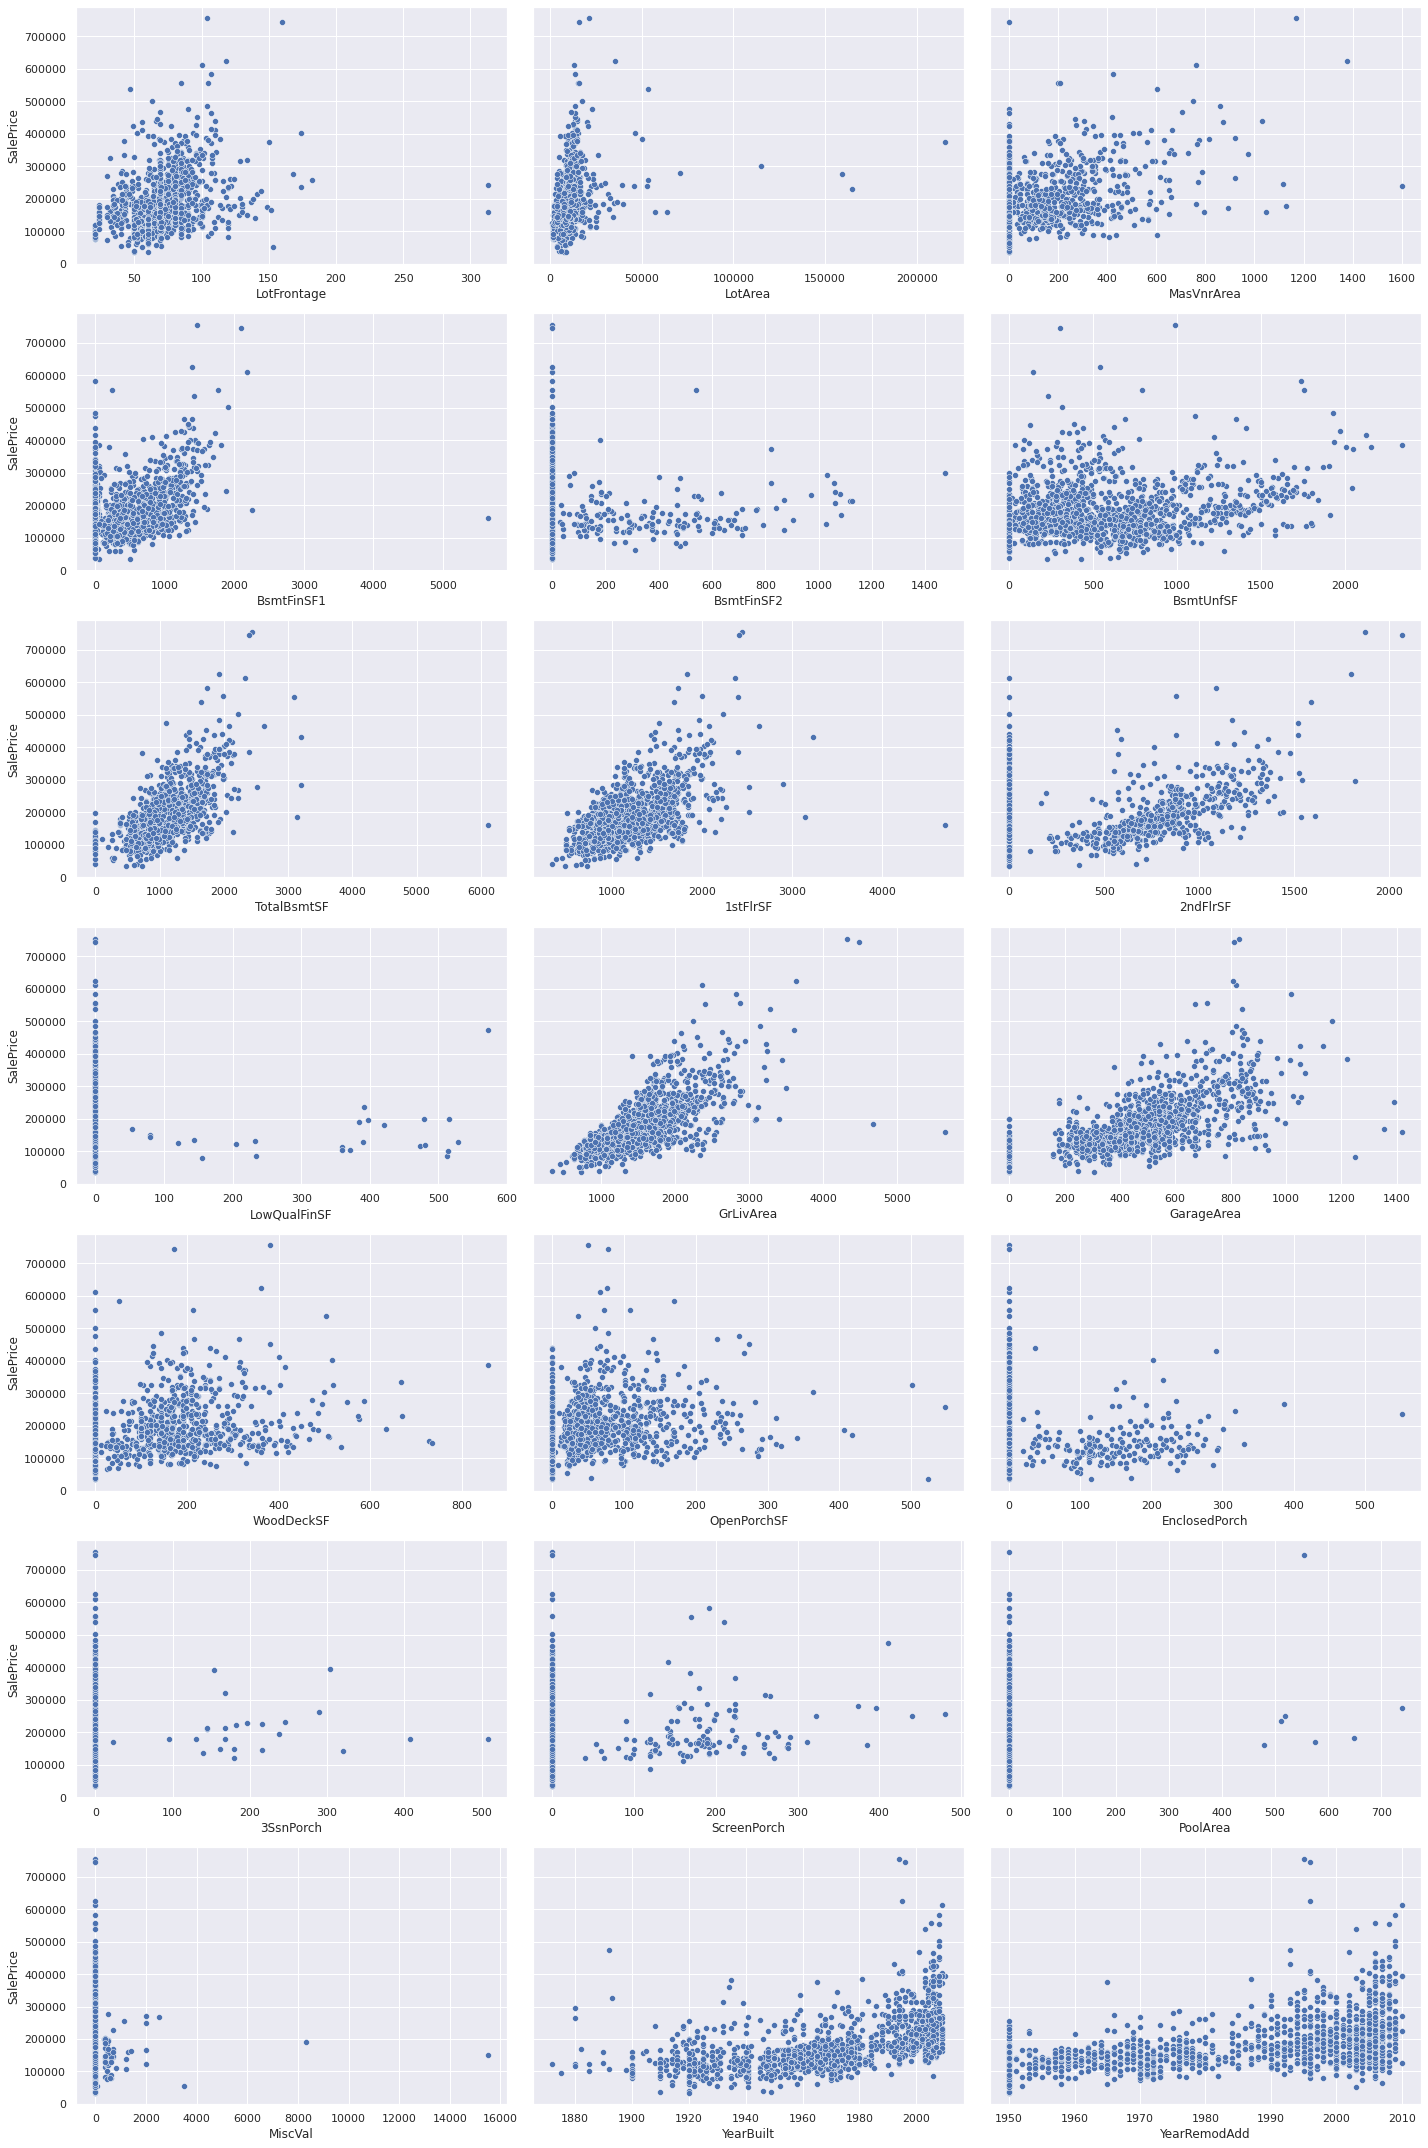

In [39]:
fig, ax = plt.subplots(7,3,figsize=(20,30),sharey=True)
i = j = 0
for att in numerical_continuous:
    sns.scatterplot(x=att,y='SalePrice',data=df_train,ax=ax[i][j])
    j = j + 1 if j <= 1 else 0
    i = i + 1 if j == 0 and i <=5 else i
    
plt.tight_layout()

Some of the continuous features like PoolArea have most of the data at 0 value. Such features may not be of much use to us, but regardless we will keep them. If they have no use, our regularized linear regression model will penalize their coefficients. Plus we want to use as much explanatory power as we can. If it negatively affects our models, we will come back and remove those by doing feature selection.

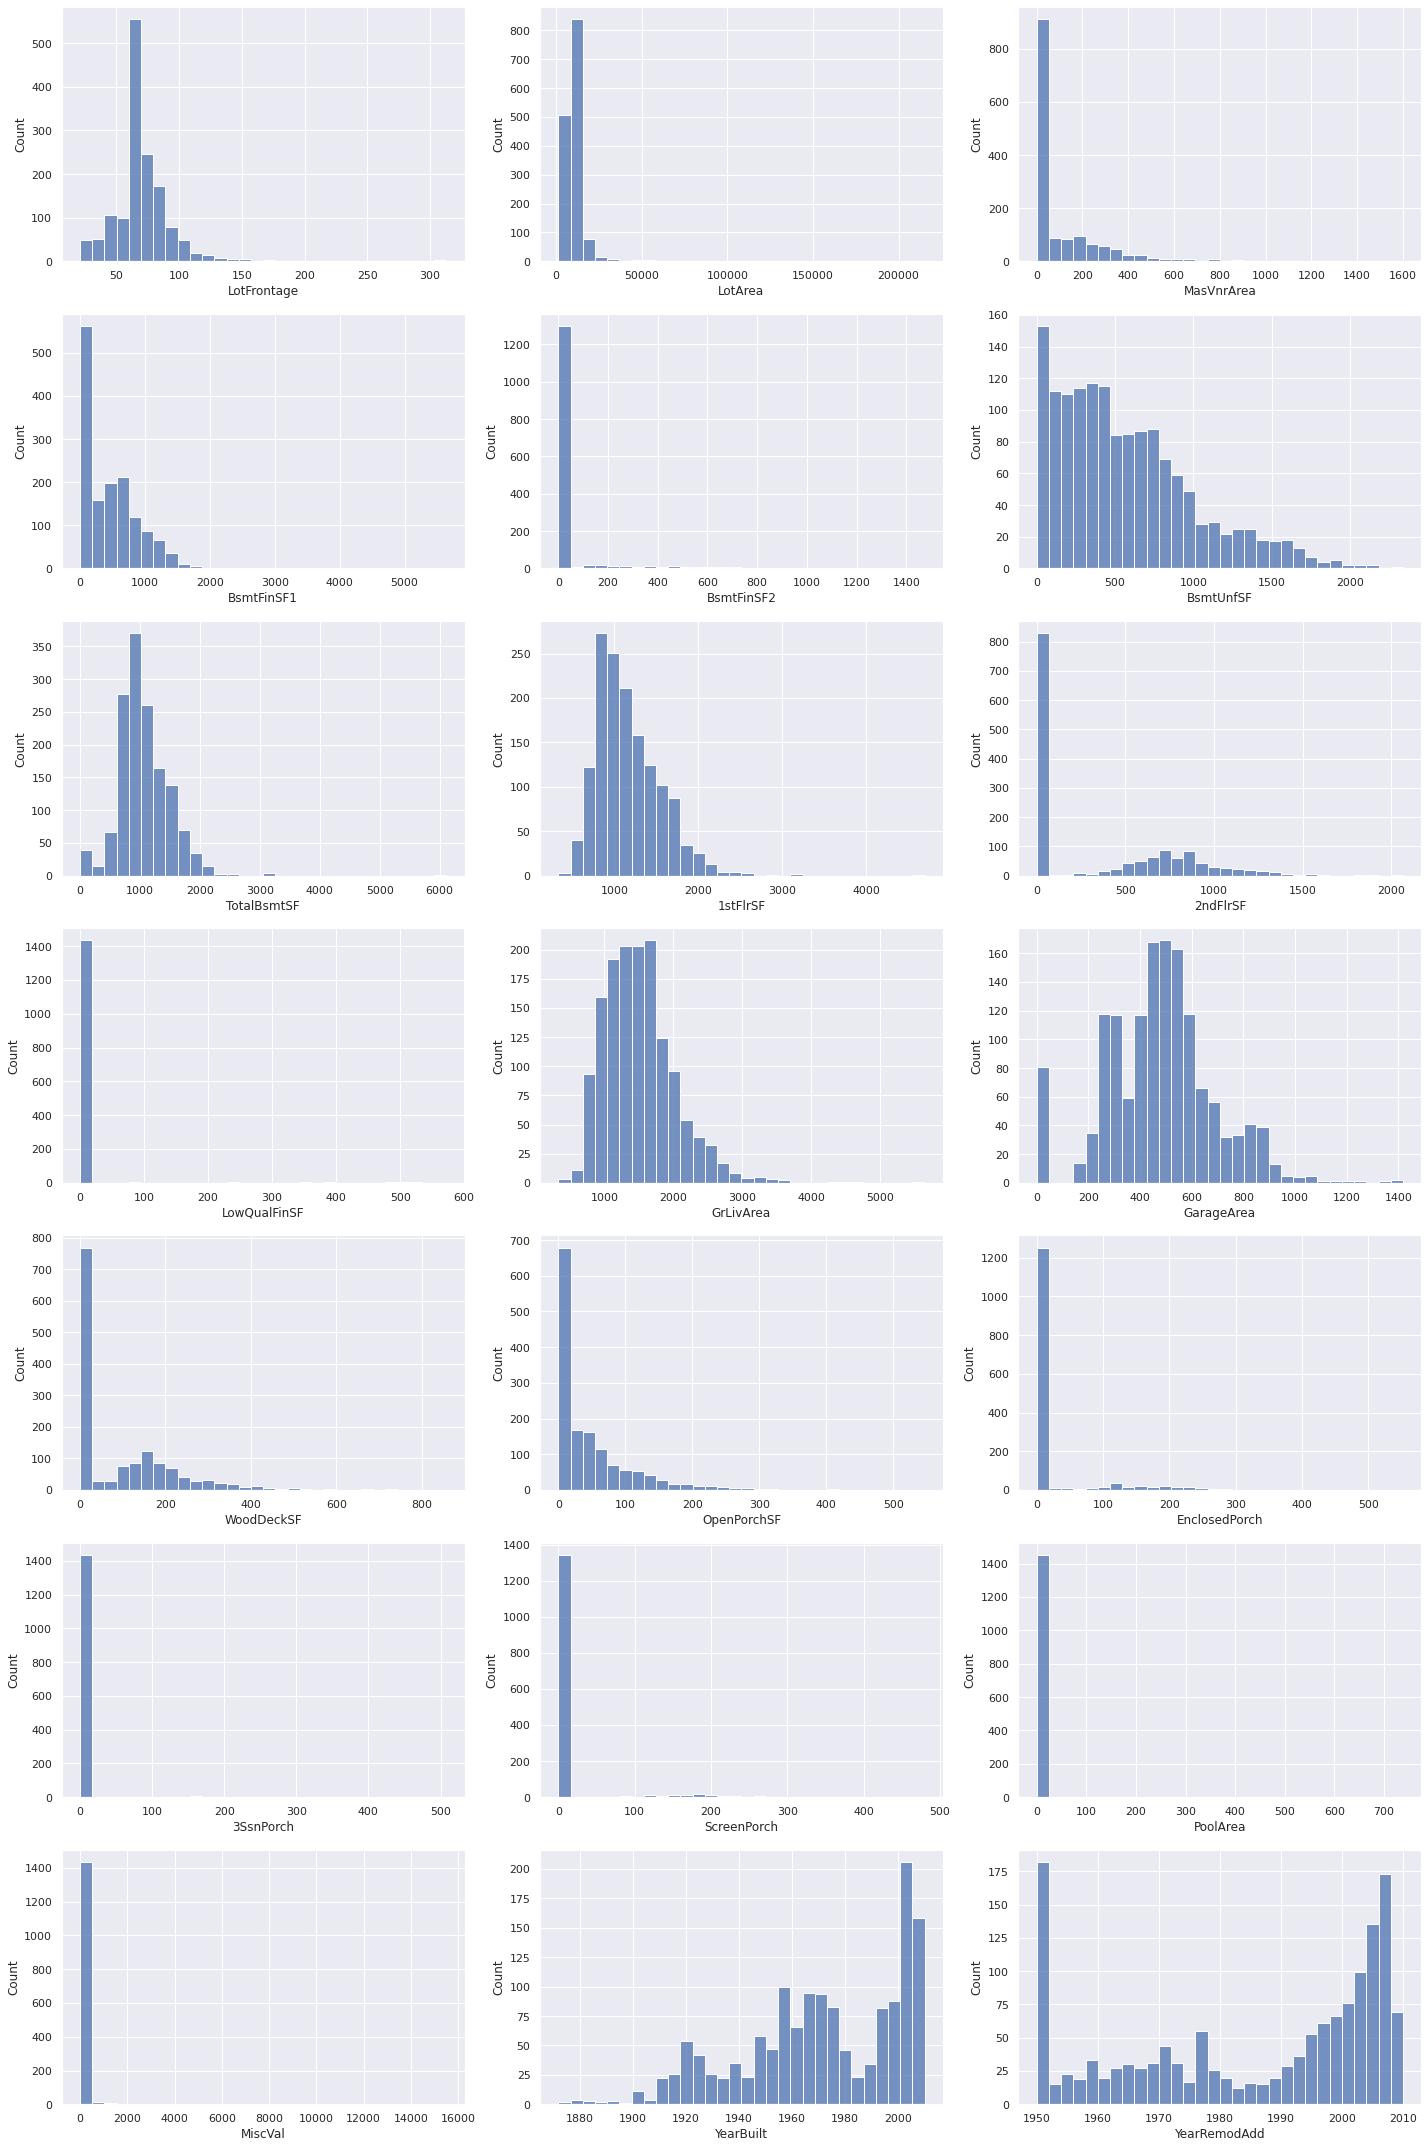

In [40]:
# Checking the distribution of our continuous numerical data

fig, ax = plt.subplots(7,3,figsize=(20,30))
i = j = 0
for att in numerical_continuous:
    sns.histplot(df_train[att],ax=ax[i][j],bins=30)
    j = j + 1 if j <= 1 else 0
    i = i + 1 if j == 0 and i <= 5 else i
    
plt.tight_layout()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

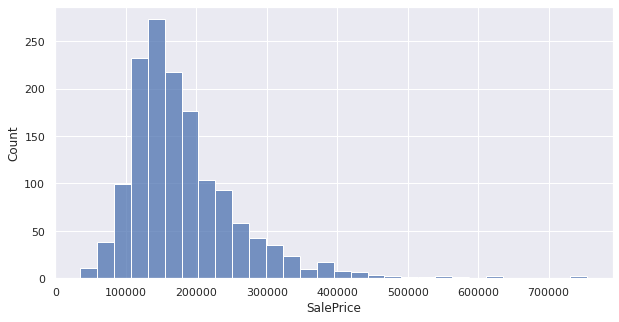

In [41]:
# We will also check the distribution of the target variable - SalePrice

fig,ax = plt.subplots(figsize=(10,5))
sns.histplot(df_train['SalePrice'],bins=30)

Most of our continuous features are right-skewed. Ideally, we need them to follow a normal distribution. It's not a necessity, but it's a good practice to have your data distribution following a normal curve. Similarly, we will also need to transform our SalePrice target variable. We will use the log transformation to convert the features and get a normal distribution. We don't need to log-transform the discrete features, but we will do it anyway. Later if we want, we can experiment with not log-transforming discrete numerical features.

Let's recollect what information we gathered from the above visualizations and what we need to do up next:

* Categorical features with high cardinality present ->> Reduce the labels with less data to a single 'rare' label.
* SalePrice shows very little variation with MoSold and YrSold features and has no order.
* Some of the discrete numerical features have high variation in SalePrice for a certain discrete value.
* Some of the continuous numerical features have most of the data at 0 value. Same is reflected in their distributions (Histogram plots).
* Right-skewed distribution of continuous numerical features and target variable SalePrice ->> Log-transform them.

## More Feature Engineering

In this section we will perform all the necessary operations on the features as discussed above in our EDA.

In [42]:
# Regrouping the discrete and continuous features into a single numerical list.
# We also rewrite the categorical list just to have it all in one place.

numerical = ['LotFrontage', 'LotArea', 'Street', 'Alley',
             'LotShape', 'LandSlope', 'OverallQual',
             'OverallCond', 'YearBuilt', 'YearRemodAdd',
             'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
             'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
             'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
             'HeatingQC', 'CentralAir', '1stFlrSF',
             '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
             'BsmtFullBath',  'BsmtHalfBath', 'FullBath',
             'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
             'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
             'FireplaceQu', 'GarageFinish', 'GarageCars',
             'GarageArea', 'GarageQual', 'GarageCond',
             'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
             'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
             'PoolArea', 'PoolQC', 'Fence', 'MiscVal',
             'MoSold', 'YrSold']

categorical = ['MSSubClass', 'MSZoning', 'LandContour', 'Utilities',
               'LotConfig', 'Neighborhood', 'Condition1',
               'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
               'RoofMatl', 'Exterior1st', 'Exterior2nd',
               'MasVnrType', 'Foundation', 'BsmtFinType1',
               'BsmtFinType2', 'Heating', 'Electrical',
               'Functional', 'GarageType', 'GarageYrBlt',
               'MiscFeature', 'SaleType', 'SaleCondition']

In [43]:
# Checking the length of the two lists combined to verify everything is in place
# We should expect 79 as the answer (81 columns - 'Id' - 'SalePrice')

len(numerical) + len(categorical)

79

Great! Let's start with the numerical features. We need to log-normalize them and for that we again create a custom transformer and call it log_norm.

In [44]:
class log_norm(BaseEstimator,TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X = X.copy()
        for att in X.columns.values:
            if X[att].min() == 0:
                X[att] = np.log1p(X[att])       # log(1+x) so that 0 values are transformed
            else:
                X[att] = np.log(X[att])

        return X

In [45]:
# Transforming the data and saving in a new variable df

df = log_norm().fit_transform(df_train[numerical])

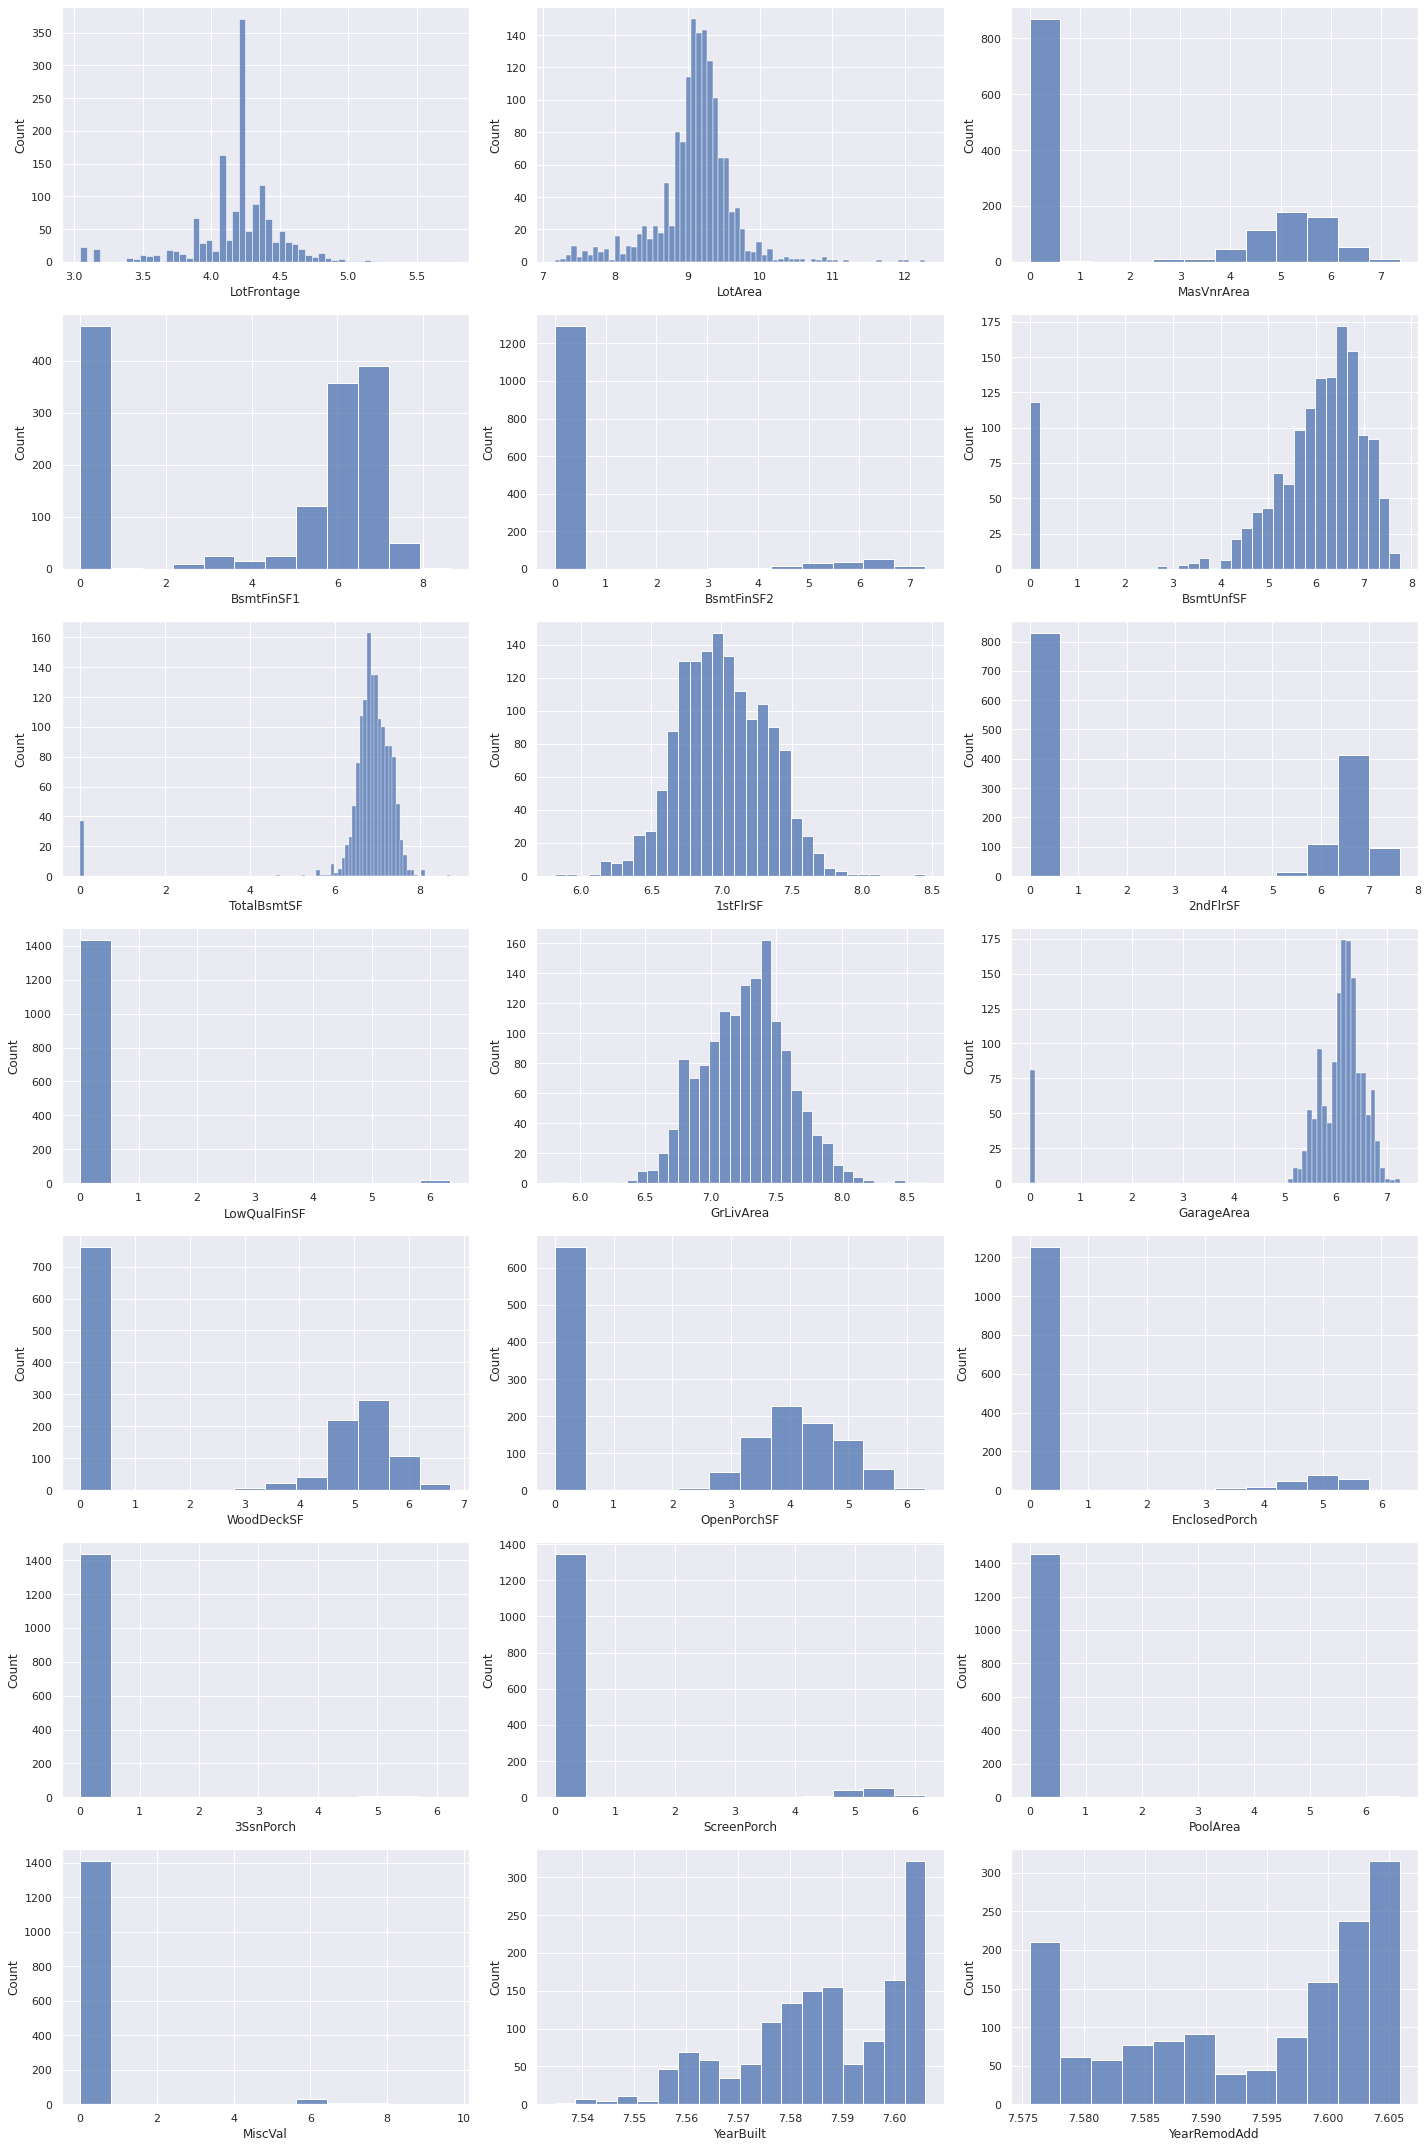

In [46]:
# PLotting to see how our transformation has worked

fig, ax = plt.subplots(7,3,figsize=(20,30))
i = j = 0
for att in numerical_continuous:
    sns.histplot(df[att],ax=ax[i][j])
    j = j + 1 if j <= 1 else 0
    i = i + 1 if j == 0 and i <= 5 else i
    
plt.tight_layout()

As we can observe, our right skewed features are now close to a normal distribution. Even features containing 0 values don't have values that span from 0 to 500000 but are now closer in range (between 0 to 10). Some features like YearBuilt and YearRemodAdd have not being affected by our transformation.

Let's move on to dealing with categorical features with high cardinality.\
Firstly, we will use the pandas value_counts function to see all the labels present in different categories and the number of data  present in those labels.

In [47]:
# Commented out because taking a lot of space

# for att in categorical:
#     print(att)
#     print(df_train[att].value_counts())
#     print('\n')

From the above value_counts output of each of the categorical feature we can see just so many labels are present in some of the features. Take Neighborhood for example - It has 25 labels and most of them have very little data. This is a big problem since with higher cardinality we need mode data but having so little data in a label will lead to poor training of our models.\
Another one such features is GarageYrBlt. We know it does not belong in the categorical list and it has 98 labels (NA and rest are year values). We have still kept it because we would be removing that column soon using another custom transformer later.

Our custom transformer will do the following:
1. It will take a threshold value (which will indicate a fraction of the total data)
2. It will list down the labels in each of the features and the number of data they contain in descending order.
3. It will add the number of data from highest to lowest and remember the labels that it added the data of.
4. Once it crosses the threshold value, it will stop adding.
5. Finally, it will replace all the labels not remembered by the transformer with 'rare'.

Let's see how we have coded the transformer below...

In [48]:
class rare_CAT(BaseEstimator,TransformerMixin):
    
    def __init__(self,threshold=0.8):
        self.threshold = threshold
    
    def fit(self,X,y=None):
        nsum = 0
        self.new_cat_label_dict = {}
        for att in X.columns.values:
            inner_df = X[att].value_counts(normalize=True)
            label_list = []
            for label in inner_df.index.values:
                nsum += inner_df.loc[label]
                label_list.append(label)
                if nsum > self.threshold:
                    self.new_cat_label_dict[att] = label_list
                    nsum = 0
                    break
        return self
    
    def transform(self,X,y=None):
        X = X.copy()
        for att, labels in self.new_cat_label_dict.items():
            X[att] = X[att].apply(lambda x: x if x in labels else 'rare')
        return X

In [49]:
# Transforming and saving in a new variable df

df = rare_CAT().fit_transform(df_train[categorical])

In [50]:
# Commented out because taking a lot of space

# for att in df.columns.values:
#     print(att)
#     print(df[att].value_counts())
#     print('\n')

And with this transformation, we have reduced the cardinality of the categorical features. We can play with the threshold value to get different results every time. I have found 0.8 to be a good choice.\
Despite this transformation we still have some features with a lot of labels (GarageYrBlt) or some features with just two labels but almost all of the data in one of the labels (Utilities). We create our final custom transformer to deal with this issue and remove any features that show this behaviour.

Our transformer will do the following:
1. Take a drop_threshold and a label_threshold value.
2. Identify which features have label count more than label_threshold value.
3. Identify which features have 2 labels and one of the labels has data less than drop_threshold value.
4. Remember the features that qualify criteria 2 or 3.
5. Drop those columns in transformation.

In [51]:
class drop_col(BaseEstimator,TransformerMixin):
    
    def __init__(self,drop_threshold=0.1,label_threshold=15):
        self.drop_threshold = drop_threshold
        self.label_threshold = label_threshold
    
    def fit(self,X,y=None):
        self.drop_list = []
        for att in X.columns.values:
            if X[att].nunique() > self.label_threshold:
                self.drop_list.append(att)
            elif X[att].nunique() == 2 and X[att].value_counts(normalize=True).iloc[1] < self.drop_threshold:
                self.drop_list.append(att)
            else:
                continue
        return self
    
    def transform(self,X,y=None):
        X = X.copy()
        X.drop(self.drop_list,axis=1,inplace=True)
        return X

In [52]:
# Transforming and saving in a new variable df

dropcol = drop_col()
df = dropcol.fit_transform(df)

In [53]:
# Checking which columns its dropped by accessing the drop_list attribute of class drop_col

dropcol.drop_list

['Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'Electrical',
 'Functional',
 'GarageYrBlt',
 'MiscFeature']

Awesome!! We removed some 8 columns that we though will not contribute much to our model. We also managed to remove the GarageYrBlt feature which we knew totally didn't belong in the categorical data. Again, both threshold values can be tweaked and we can check which works best for us. I have kept them at 0.1 for drop and 15 for label threshold.

## Creating Data Preparation Pipeline

Now that all our cleaning and feature engineering is complete, let's club all our transformers and create a pipeline which will do all the steps that we did up till now in one go.

In [54]:
# Creating a pipeline object with MissingImputer and ord_MAP transformers 

pipe = Pipeline(steps=[
                        ('imputing',MissingImputer()),
                        ('ord_map',ord_MAP())
                        ])

In [55]:
# Creating the numerical pipeline where we log-normalize our data.
# We also use robust scaler to do scaling on our numerical data.
# This is one of the better ways to scale if your data has outliers.

numerical_pipeline = Pipeline(steps=[
                                     ('log_norm',log_norm()),
                                     ('rscale',RobustScaler())
                                    ])

In [56]:
# Creating a categorical pipeline where we create rare categories and drop columns.
# Then we perform one hot encoding.
# Notice that we will be ignoring any columns if they are not present in our testing data set.
# Robust Scaling our one hot encoded features makes absolutely no sense.
# We are still doing it for consistency with the numerical pipeline.

categorical_pipeline = Pipeline(steps=[
                                       ('rarecat',rare_CAT()),
                                       ('dropcol',drop_col()),
                                       ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore')),
                                       ('rscaler',RobustScaler())
                                      ])

In [57]:
# Now we create a column transformer object which will handle our numerical and categorical pipelines.
# Once done transforming, column transformer will combine the output
# of these two pipelines and out put a single numpy array.

ct = ColumnTransformer(transformers=[('num',numerical_pipeline,numerical),('cat',categorical_pipeline,categorical)])

In [58]:
# We combine our data cleaning pipeline and the column transformer in a single pipeline called preprecess_pipeline.

preprocess_pipeline = Pipeline(steps=[('pipe',pipe),
                                      ('ct',ct)])

With all the data preparation pipeline ready, let's test it and fit and transform our train and test data.

In [59]:
# We reset our df_train dataframe by performing the following operations again.

df_train = train.copy()
df_test = test.copy()

df_train.drop(['Id'],axis=1,inplace=True)
df_test.drop(['Id'],axis=1,inplace=True)

In [60]:
# Fitting, transforming and saving the training data in variable X.

X = preprocess_pipeline.fit_transform(df_train)

In [61]:
# Saving the target in variable y but we do a log-normalization first.

y = np.log(df_train['SalePrice'])

In [62]:
# Transforming the test data using the already fitted preprocess_pipeline and saving in variable x_test.

x_test = preprocess_pipeline.transform(df_test)

Let's check the shape of our outputs...

In [63]:
print('Training data shape: {} | Target Shape: {} | Testing Data Shape: {}'.format(X.shape,y.shape,x_test.shape))

Training data shape: (1460, 124) | Target Shape: (1460,) | Testing Data Shape: (1459, 124)


As we can see, now we have 124 columns in our final prepared datasets. The number of columns have increased from 79 to 124 because we did one hot encoding despite dropping a few columns on our way. This number will change based on the threshold values we set in our categorical pipeline.

## Testing Machine Learning Models

We are finally in the last stages of our project where we will evaluate different machine learning models based on their cross validation score and select a few of them to proceed with hyperparameter tuning.\
We will start with splitting our data in train and validation splits, then we will define the cross validation method and finally define a few functions to evaluate our models.

In [64]:
# We create a validation split since we already have a test split available.

x_train, x_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
# We use RepeatedKFold cross validation so that we can be sure that the CV score we calculate is not out of luck.

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [66]:
# Defining a scoring function
# Since the competition calculates the root mean squared log error, we will define the same.
# We will also calculate the exponent of the predicted target values since they were log-normalized earlier.

def rmsle(y_true,y_pred):
    msle = mean_squared_log_error(np.exp(y_true),np.exp(y_pred))
    return np.sqrt(msle) 

In [67]:
# To use the above function in sklearn's metrics, we will have to convert it into a scorer using sklearn's make_scorer.

scorer = make_scorer(rmsle,greater_is_better=False)        # Greater error is not better :P

In [68]:
# We will define another function which will evaluate our models on the validation set.

def evaluate_model(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_val)
    return rmsle(y_val,y_pred)

In [69]:
# Finally we build a function to evaluate the base CV scores of multiple machine learning models

def base_CV_results(models):
    
    CV_result = []
    for model in models:
        scores = cross_val_score(estimator=model,X=x_train,y=y_train,cv=cv,scoring=scorer,n_jobs=-1)
        CV_result.append((scores.mean(),scores.std()))
    
    for model, scores in zip(models,CV_result):
        print(str(model).split('(')[0],'--> score_mean: {0:.4f} | score_std: {0:.4f}'.format(scores[0],scores[1]))
    
    return

In [70]:
# Creating a list of models we want to test

models = [LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),
          RandomForestRegressor(), AdaBoostRegressor(),GradientBoostingRegressor(),
          XGBRegressor()]

# Running the base_CV_results function to check base scores

base_CV_results(models)

LinearRegression --> score_mean: -0.1385 | score_std: -0.1385
SVR --> score_mean: -0.1509 | score_std: -0.1509
KNeighborsRegressor --> score_mean: -0.1855 | score_std: -0.1855
DecisionTreeRegressor --> score_mean: -0.2138 | score_std: -0.2138
RandomForestRegressor --> score_mean: -0.1428 | score_std: -0.1428
AdaBoostRegressor --> score_mean: -0.1742 | score_std: -0.1742
GradientBoostingRegressor --> score_mean: -0.1296 | score_std: -0.1296
XGBRegressor --> score_mean: -0.1395 | score_std: -0.1395


Taking in mind the base CV scores, we will proceed to hyperparameter tuning with the  following models:
1. Linear Regression
2. Support Vector Regressor
3. Random Forest Regressor
4. Gradient Boosting Regressor
5. XGB Regressor

## Hyperparameter Tuning

In this section, we will use GridSearchCV and RandomSearchCV to find the best parameters for our selected 5 ML models.

#### ElasticNet

Let's start with Linear Regression. Since we know that sklearn's linear regression model follows L2 norm regularization, why not take it in our hands and implement an ElasticNet model which allows us to decide the composition of L1 and L2 norms for our linear regression?\
So we will use ElasticNetCV to find the best hyperparameters and decide an optimal regularization for our linear model.

In [71]:
# encv = ElasticNetCV(l1_ratio=np.arange(0.01,1.01,0.01),cv=cv,random_state=42)
# encv.fit(x_train,y_train)
# encv.l1_ratio_, encv.alpha_

We will save the best parameters and create an ElasticNet model instance with those saved parameters.

In [72]:
# Creating an instance of ElasticNet and saving the model in eln

eln = ElasticNet(l1_ratio=0.26,alpha=0.002015866759221431)

In [73]:
# Evaluating the model and saving in the results dictionary

results = {}
results['ElasticNet'] = evaluate_model(eln)

#### Support Vector Regressor

Now onto the SVR model. We wil use GridSearchCV to identify the best set of parameters.

In [74]:
# # Performing a step by step grid search by updating parameter grid. 
# # This helps in reducing the computation time as we are not dealing with too many parameters at a time

# SVR_grid = {'kernel':['linear','poly','rbf']}
# SVR_grid = {'epsilon':[0.01,0.1,1],'C':[0.1,1,10]}
# SVR_grid = {'epsilon':[0.01,0.05,0.1],'C':[0.1,0.5,1]}
# SVR_grid = {'epsilon':np.arange(0.01,0.11,0.01),'C':np.arange(0.01,0.11,0.01)}

# gs = GridSearchCV(estimator=SVR(kernel='linear'),param_grid=SVR_grid,cv=cv,n_jobs=-1,
#                   scoring=scorer,verbose=1)

# gs.fit(x_train,y_train)
# gs.best_params_

In [75]:
# Creating an instance of the best SVR model and evaluating

svr = SVR(kernel='linear',C=0.03,epsilon=0.04)

results['SVR'] = evaluate_model(svr)

#### Random Forest Regressor

For tree based ensemble models, we won't be using GridSearchCV but instead we will use RandomSearchCV. That's because tree based models have a lot of parameters to tune and using grid search will be computationally expensive. Random search on the other hand randomly picks up a set of parameters from the grid and cross validates the model.

In [76]:
# RF_grid = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000], 'max_depth':np.arange(2,21,2),'min_samples_split':np.arange(2,21,2), 
#            'min_samples_leaf':np.arange(1,21,2)}
# rs = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),param_distributions=RF_grid, n_iter=100,
#                         cv=cv,scoring=scorer,n_jobs=-1,verbose=1,random_state=42)
# rs.fit(x_train,y_train)
# rs.best_params_

In [77]:
# Creating an instance of the best RF model and evaluating

rf = RandomForestRegressor(n_estimators=700,min_samples_split=2,min_samples_leaf=1,max_depth=18,random_state=42)

results['RandomForest'] = evaluate_model(rf)

#### Gradient Boosting Regressor

Gradient Boosting is a boosting algorith that incorporates several weak learners to build a strong one. The model uses weak decision trees and chains them, each consecutive tree trying to work on the shortcomings of the previous one.

In [78]:
# GB_grid = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000], 'max_depth':np.arange(1,11,1),'min_samples_split':np.arange(2,11,1), 
#            'min_samples_leaf':np.arange(1,11,1), 'learning_rate':np.arange(0.01,0.5,0.01)}
# rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42),param_distributions=GB_grid, n_iter=100,
#                         cv=cv,scoring=scorer,n_jobs=-1,verbose=1,random_state=42)
# rs.fit(x_train,y_train)
# rs.best_params_

In [79]:
# Creating an instance of the best GBR model and evaluating

gbt = GradientBoostingRegressor(n_estimators=600,min_samples_split=4,min_samples_leaf=1,max_depth=4,learning_rate=0.08,random_state=42)

results['GBReg'] = evaluate_model(gbt)

#### XGBoost Regressor

XGB is basically extreme gradient boosting. It's one of the best tree based boosting algorithms. The concept is same - using weak learners, chaining them and building a strong model.

In [80]:
# XGB_grid = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000], 'max_depth':np.arange(1,11,1),'max_leaves':np.arange(0,21), 
#            'booster':['gbtree','gblinear'], 'learning_rate':np.arange(0.01,0.5,0.01),'colsample_bytree':np.arange(0.1,1,0.1),
#            'reg_alpha':np.arange(0,1,0.1)}
# rs = RandomizedSearchCV(estimator=XGBRegressor(random_state=42),param_distributions=XGB_grid, n_iter=100,
#                         cv=cv,scoring=scorer,n_jobs=-1,verbose=3,random_state=42)
# rs.fit(x_train,y_train)
# rs.best_params_

In [81]:
# Creating an instance of the best XGB model and evaluating

xgb = XGBRegressor(n_estimators=700,max_leaves=20,max_depth=2,learning_rate=0.13,colsample_bytree=0.2,random_state=42)

results['XGBReg'] = evaluate_model(xgb)

Now we have tuned, trained and evaluated all the 5 models we shortlisted. Let's see the scores of these models...

In [82]:
results

{'ElasticNet': 0.13568771813518857,
 'SVR': 0.13444235677471425,
 'RandomForest': 0.14612869838315662,
 'GBReg': 0.1363194373429797,
 'XGBReg': 0.1373587829674343}

4 out of 5 models have performed very closely. Random Forest Regressor has the worst error of the 5 and is quite significantly high as compared to the other ones. For ensembling, we will proceed with all the models except for random forest.

## Ensembling the Best Models

We will use the predictive power of the 4 selected models and try to predict the house prices by aggregating the prediction of each of the 4 models. For this, we will use sklearn's VotingRegressor.

In [83]:
# Creating an instance of voting regressor model with 4 ML models combined.

reg = VotingRegressor(estimators=[('eln',eln),
                                  ('svr',svr),
                                  ('gbt',gbt),
                                  ('xgb',xgb)],
                      n_jobs=-1)

In [84]:
evaluate_model(reg)

0.1293657333226561

Awesome!! Our error seems to have dramatically reduced as compared to other individual models. This shows that ML models when combined can be extremely powerful.\
Now let's complete our pipeline by including our Voting Regressor along with our previous data preparation pipeline.

## Complete Data Preparation and ML Pipeline

In [85]:
fpipe = Pipeline(steps=[('prep',preprocess_pipeline),
                        ('ML',reg)])

Now comes the real test of making the prediction on the test set. We will use our pipeline to predict the house prices of the test data and make submission on Kaggle to evaluate the final score.

In [86]:
fpipe.fit(df_train,y)                # y = np.log(df_train['SalePrice'])
pred = fpipe.predict(df_test)
pred = np.exp(pred)
submission = pd.DataFrame(pred,columns=['SalePrice'],index=test.Id)
submission.to_csv('submission.csv',index_label='Id')

Our submission on Kaggle has given us an error of **0.12018** which puts us in **top 7%** out of about 4600 submissions.